In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
print(tf.__version__)

2.19.0


In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, X_test.shape

X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=(28*28,)),  # Corrected shape
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'), 
        layers.Dense(10),
    ]
)

model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

#functional API

inputs = keras.Input(shape = (28*28,))
x = layers.Dense(512, activation='relu', name = "first_layer")(inputs)
x = layers.Dense(256, activation='relu', name = "second_layer")(x)
outputs = layers.Dense(10, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

print(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=["accuracy"]
)
model.fit(X_train, y_train, batch_size = 32, epochs = 5, verbose = 2)
model.evaluate(X_test, y_test, batch_size = 32, verbose = 2)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_layer (Dense)             │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_layer (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9249 - loss: 0.2525
Epoch 2/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9699 - loss: 0.1006
Epoch 3/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9803 - loss: 0.0656
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9852 - loss: 0.0478
Epoch 5/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9905 - loss: 0.0323
313/313 - 0s - 2ms/step - accuracy: 0.9774 - loss: 0.0732


[0.07319092005491257, 0.977400004863739]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: 6
Actual class: 6


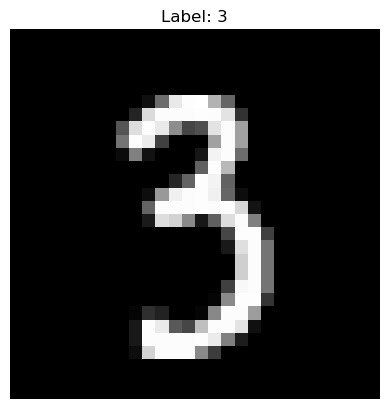

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test[98].reshape(1, -1))  # Reshape to (1, 784)
predicted_class = np.argmax(predictions, axis=1)[0]

print("Predicted class:", predicted_class)
print("Actual class:", y_test[98])

plt.imshow(X_test[98].reshape(28, 28), cmap="gray")  # 28x28 image
plt.title(f"Label: {y_test[98]}")
plt.axis("off")
plt.show()
